In [11]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = quandl.get("WIKI/AMZN", start_date = "2000-01-01")

In [13]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0


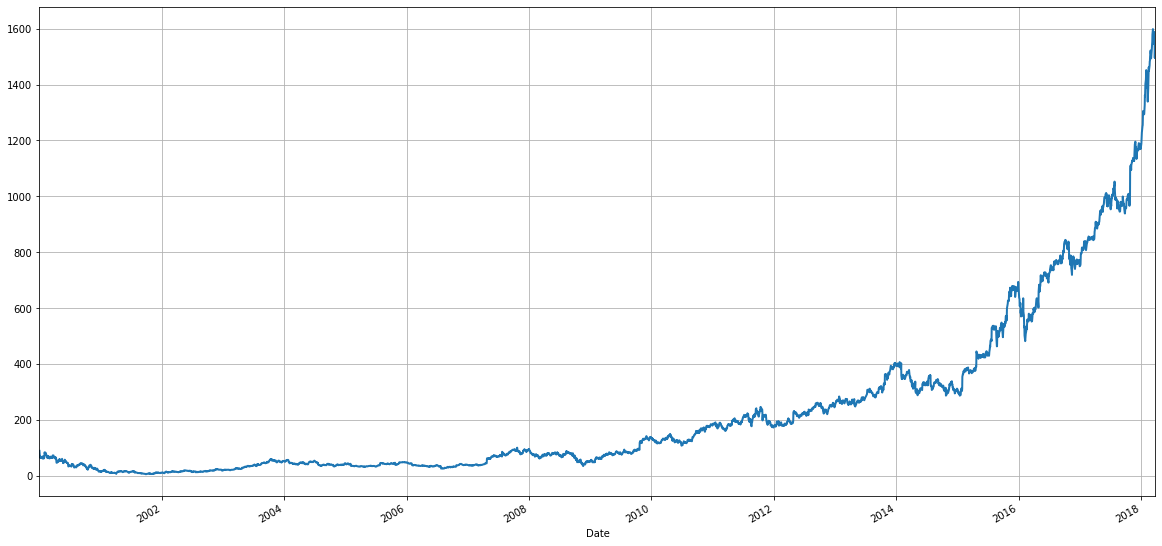

In [14]:
df['Close'].plot(grid = True, figsize = (20, 10), lw = 2)
plt.show()

# Trading Signals

In [15]:
short_window = 40
long_window = 100

signals = pd.DataFrame(index = df.index)
signals['signal'] = 0.0

signals['short_mavg'] = df['Close'].rolling(window = short_window, min_periods = 1, center = False).mean()
signals['long_mavg'] = df['Close'].rolling(window = long_window, min_periods = 1, center = False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
display(signals)

,signal,short_mavg,long_mavg,positions
Date,,,,
2000-01-03,0.0,89.380000,89.380000,NaN
2000-01-04,0.0,85.660000,85.660000,0.0
2000-01-05,0.0,81.023333,81.023333,0.0
2000-01-06,0.0,77.157500,77.157500,0.0
2000-01-07,0.0,75.638000,75.638000,0.0
...,...,...,...,...
2018-03-21,1.0,1480.789500,1297.192500,0.0
2018-03-22,1.0,1485.454250,1302.904400,0.0
2018-03-23,1.0,1488.394500,1308.135700,0.0


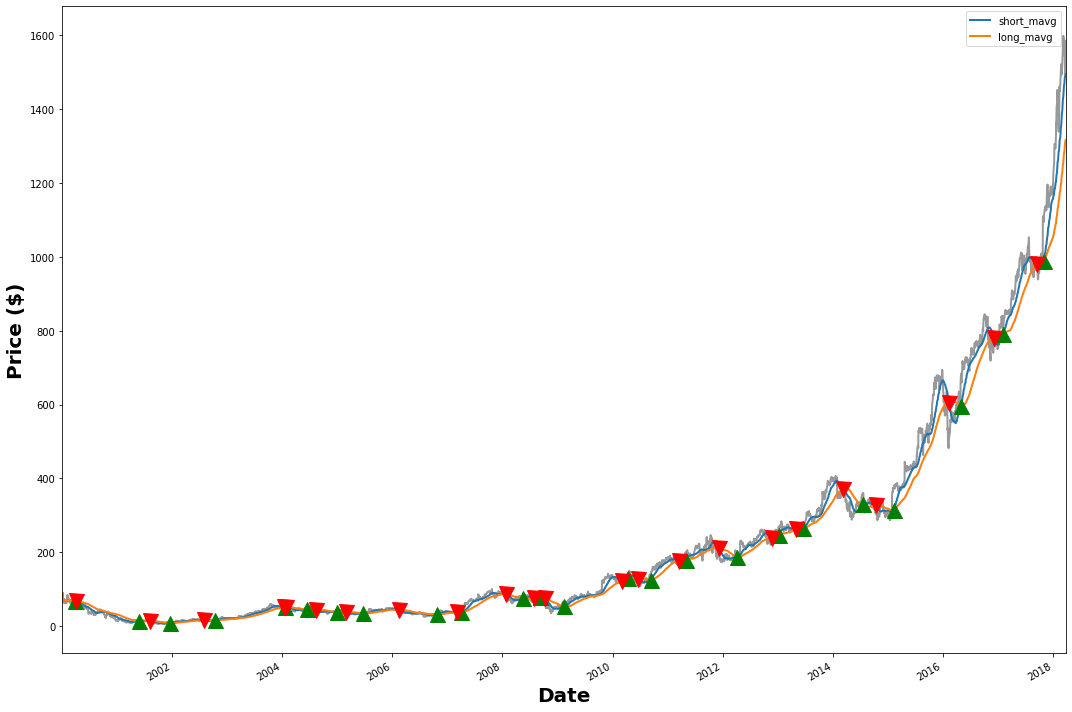

In [16]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(111, ylabel = 'Price ($)')
df['Close'].plot(ax=ax1, color = 'black', lw = 2., alpha = 0.4)
signals[['short_mavg', 'long_mavg']].plot(ax = ax1, lw = 2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize = 15, color = 'g')
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize = 15, color = 'r')
plt.ylabel('Price ($)', fontweight = 'bold', fontsize = 20)
plt.xlabel('Date', fontweight = 'bold', fontsize = 20)
plt.tight_layout()

# Backtesting`

In [18]:
initial_capital = float(100000)
positions = pd.DataFrame(index = signals.index).fillna(0.0)
positions['Position'] = 1000*signals['signal']
portfolio = positions.multiply(df['Close'], axis = 0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df['Close'], axis = 0)).sum(axis = 1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Close'], axis = 0)).sum(axis = 1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
del portfolio['Position']

In [26]:
portfolio.tail(60)

,holdings,cash,total,returns
Date,,,,
2017-12-29,1169470.0,-472183.3,697286.7,-0.023294
2018-01-02,1189010.0,-472183.3,716826.7,0.028023
2018-01-03,1204200.0,-472183.3,732016.7,0.021191
2018-01-04,1209590.0,-472183.3,737406.7,0.007363
2018-01-05,1229140.0,-472183.3,756956.7,0.026512
2018-01-08,1246870.0,-472183.3,774686.7,0.023423
2018-01-09,1252700.0,-472183.3,780516.7,0.007526
2018-01-10,1254330.0,-472183.3,782146.7,0.002088
2018-01-11,1276680.0,-472183.3,804496.7,0.028575


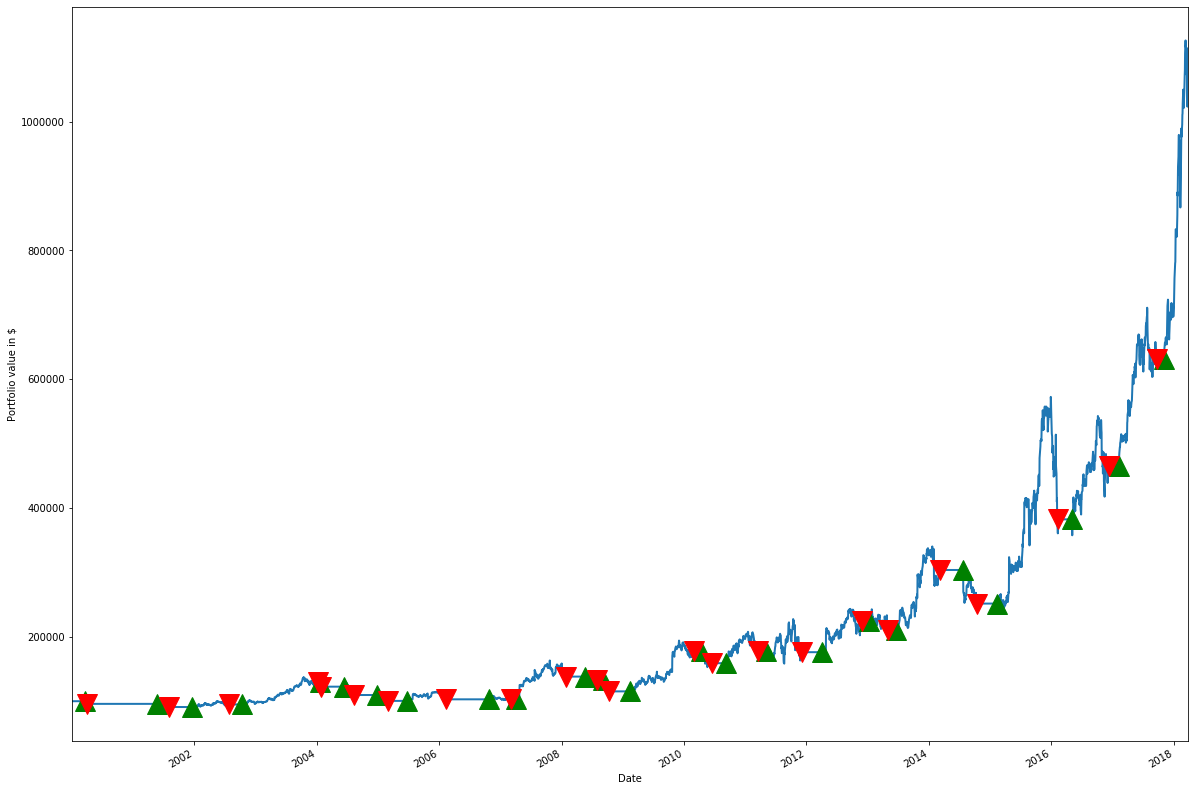

In [20]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(111,ylabel = 'Portfolio value in $')
portfolio.total.plot(ax = ax1, lw = 2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0], '^', markersize = 20, color = 'g')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0], 'v', markersize = 20, color = 'r')
plt.show()

In [21]:
print("Portfolio Total Value as of June 15, 2020")
print(portfolio['total'].tail(1))
print("Absolute return as of June 15, 2020")
print(((portfolio.total.tail(1)/float(100000))-float(1))*100)

Portfolio Total Value as of June 15, 2020
Date
2018-03-27    1024866.7
Name: total, dtype: float64
Absolute return as of June 15, 2020
Date
2018-03-27    924.8667
Name: total, dtype: float64
